# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [1]:
import numpy as np

class Linear_Regression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coefficients = None

    def fit(self, X, y):

        # bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # coefficients
        self.coefficients = np.zeros(X.shape[1])

        # Gradient descent
        for _ in range(self.epochs):
            gradients = -(2/X.shape[0]) * X.T.dot(y - X.dot(self.coefficients))
            self.coefficients -= self.learning_rate * gradients

    def predict(self, X):
        # Add bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # predictions
        y_pred = X.dot(self.coefficients)
        return y_pred

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


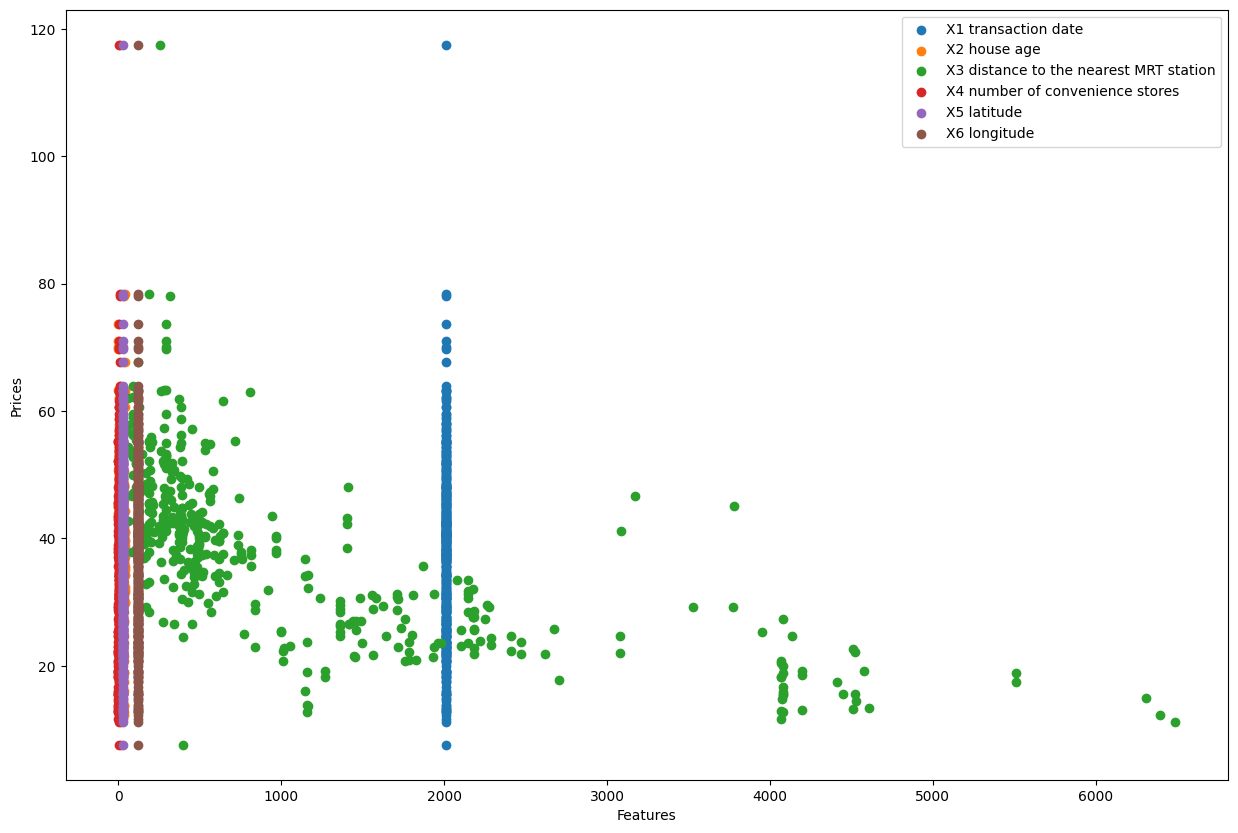

Mean Squared Error: 69.04778198840725
R2 Score: 0.5646930570112327

Scikit-learn Logistic Regression Model:
Mean Squared Error: 66.6733627183596
R2 Score: 0.579662418286177


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("Real estate.csv")

# checking for null values
print(data.isnull().sum())

features = data.columns[1:-1]
target = data.columns[-1]

# plotting
plt.figure(figsize=(15, 10))
for feature in features:
    plt.scatter(data[feature], data[target], label=feature)
plt.xlabel("Features")
plt.ylabel("Prices")
plt.legend()
plt.show()

# Remove unwanted columns
data.drop(columns=["No"], inplace=True)

# Spliting the dataset into training and testing data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalizing the features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

model = Linear_Regression(0.01, 1000)
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Using scikit learn model of Linear Regression
sklearn_logistic_regression_model = LinearRegression()
sklearn_logistic_regression_model.fit(X_train_normalized, y_train)
y_pred_sklearn_model = sklearn_logistic_regression_model.predict(X_test_normalized)

mse_sklearn_model = mean_squared_error(y_test, y_pred_sklearn_model)
r2_sklearn_model = r2_score(y_test, y_pred_sklearn_model)
print("\nScikit-learn Logistic Regression Model:")
print("Mean Squared Error:", mse_sklearn_model)
print("R2 Score:", r2_sklearn_model)

# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression


data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


5. Write code for the sigmoid function and Logistic regression.


In [5]:

import numpy as np

def sigmoid(z):
   return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [6]:
logistic_regression_model = LogisticRegression(learning_rate=0.01, epochs=1000)
logistic_regression_model.fit(X_train, y_train)
y_pred_own_model = logistic_regression_model.predict(X_test)


penalties = ['l1', 'l2']
for penalty in penalties:
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

    sklearn_logistic_regression_model = SklearnLogisticRegression(penalty=penalty, solver=solver)
    sklearn_logistic_regression_model.fit(X_train, y_train)
    y_pred_sklearn_model = sklearn_logistic_regression_model.predict(X_test)

    accuracy_sklearn_model = accuracy_score(y_test, y_pred_sklearn_model)
    print("Accuracy score for scikit-learn Logistic Regression model with penalty", penalty, ":", accuracy_sklearn_model)

     

Accuracy score for scikit-learn Logistic Regression model with penalty l1 : 0.9736842105263158
Accuracy score for scikit-learn Logistic Regression model with penalty l2 : 0.9736842105263158


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [7]:
best_accuracy = 0
best_sklearn_model = None
best_penalty = None
penalties = ['l1', 'l2']
for penalty in penalties:
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

    sklearn_logistic_regression_model = SklearnLogisticRegression(penalty=penalty, solver=solver)
    sklearn_logistic_regression_model.fit(X_train, y_train)
    y_pred_sklearn_model = sklearn_logistic_regression_model.predict(X_test)

    print("Classification Report for scikit-learn Logistic Regression model with penalty", penalty, ":")
    print(classification_report(y_test, y_pred_sklearn_model))
    print("Confusion Matrix for scikit-learn Logistic Regression model with penalty", penalty, ":")
    print(confusion_matrix(y_test, y_pred_sklearn_model))

    if accuracy_sklearn_model > best_accuracy:
        best_accuracy = accuracy_sklearn_model
        best_sklearn_model = sklearn_logistic_regression_model
        best_penalty = penalty

Classification Report for scikit-learn Logistic Regression model with penalty l1 :
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix for scikit-learn Logistic Regression model with penalty l1 :
[[42  1]
 [ 2 69]]
Classification Report for scikit-learn Logistic Regression model with penalty l2 :
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix for scikit-learn Logistic Regression model with penalty l2 :
[[41 

# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data1 = pd.read_csv("glass.csv")
print(data1.head(5))
X = data1.iloc[:, 1:-1]
y = data1["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [9]:

# euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        #getting distances from all data points
        k_indices = np.argsort(distances)[:self.k]
        
        # we need to find the nearest k data points
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Returning the most common class label
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common

# Convert pandas DataFrame to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize and fit the KNN model
knn = KNN(k=3)
knn.fit(X_train, y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Different values of k
k_values = [1, 3, 5, 7, 9]
acc_scores = []
sklearn_scores = []

for k in k_values:

    # our KNN model
    my_knn = KNN(k=k)
    my_knn.fit(X_train, y_train)
    y_pred_custom = my_knn.predict(X_test)
    our_accuracy = accuracy_score(y_test, y_pred_custom)
    acc_scores.append(our_accuracy)

    # Scikit-learn KNN model
    sklearn_knn = KNeighborsClassifier(n_neighbors=k)
    sklearn_knn.fit(X_train, y_train)
    y_pred_sklearn = sklearn_knn.predict(X_test)
    sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
    sklearn_scores.append(sklearn_accuracy)

In [11]:

print("KNN Accuracy Scores from our model:", acc_scores)
print("KNN Accuracy Scores from sklearn model:", sklearn_scores)

KNN Accuracy Scores from our model: [0.8372093023255814, 0.7441860465116279, 0.6511627906976745, 0.6046511627906976, 0.627906976744186]
KNN Accuracy Scores from sklearn model: [0.8372093023255814, 0.7441860465116279, 0.6511627906976745, 0.6046511627906976, 0.627906976744186]
